In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
tm = pd.read_csv('timing.csv',header = None, names=['method','error','val','threads','numpoints','time'])
tr = tm.loc[tm['method']=='Trapezoidal']
mc = tm.loc[tm['method']=='Monte-Carlo']

In [57]:
print "Data - Trapezoidal \n"
tr = tr.groupby(['threads']).mean()
print tr['time']
print "\nData - Monte Carlo\n"
mc = mc.groupby(['threads']).mean()
print mc['time']

Data - Trapezoidal 

threads
1    0.000674
2    0.000354
3    0.000268
4    0.000211
Name: time, dtype: float64

Data - Monte Carlo

threads
1    0.000939
2    0.000470
3    0.000347
4    0.000308
Name: time, dtype: float64


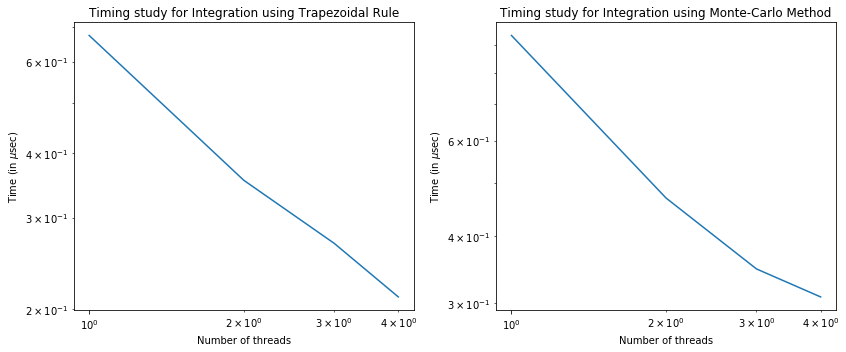

In [61]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].loglog(tr.index,tr.time*1e3);
axs[0].set_xlabel('Number of threads');
axs[0].set_ylabel(r'Time (in $\mu$sec)');
axs[0].set_title('Timing study for Integration using Trapezoidal Rule')

axs[1].loglog(mc.index,mc.time*1e3);
axs[1].set_xlabel('Number of threads');
axs[1].set_ylabel(r'Time (in $\mu$sec)');
axs[1].set_title('Timing study for Integration using Monte-Carlo Method')

plt.savefig('timing.png')
plt.tight_layout()
plt.show()

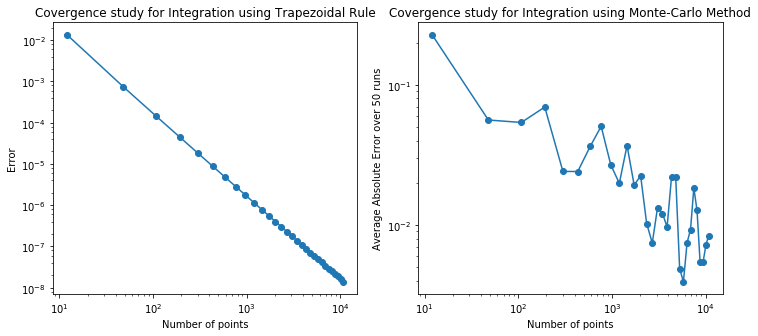

In [30]:
conv = pd.read_csv('conv.csv',header = None, names=['method','error','val','threads','numpoints','time'])
tr = conv.loc[conv['method']=='Trapezoidal']
mc = conv.loc[conv['method']=='Monte-Carlo']
mc = mc.groupby(['numpoints']).mean()

tx = tr.numpoints
mx = list(mc.index)
ty = tr.error
my = mc.error

fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].loglog(tx,ty,'-o');
axs[0].set_xlabel('Number of points');
axs[0].set_ylabel('Error');
axs[0].set_title('Covergence study for Integration using Trapezoidal Rule')

axs[1].loglog(mx,my,'-o');
axs[1].set_xlabel('Number of points');
axs[1].set_ylabel('Average Absolute Error over 50 runs');
axs[1].set_title('Covergence study for Integration using Monte-Carlo Method')

plt.savefig('conv.png')
plt.show()